# Imports

In [1]:
import os
import numpy as np
import tensorflow as tf
import keras
import itertools

#from keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import img_to_array, array_to_img, load_img
from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input

from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input as preprocess_input_vgg19
from keras.applications.vgg19 import decode_predictions as decode_vgg19

from keras.datasets import cifar10
#this dataset can also be downloaded from https://www.cs.toronto.edu/~kriz/cifar.html

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import TensorBoard

from time import strftime # gives hours and minutes of current time.

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

The following codes can be run in two ways:
1. Run on your local machine using anaconda.
   - To install TensorFlow2 and Keras on Anaconda, run the following commands on the shell:\
     conda install –c conda-forge tensorflow\
     conda install –c conda-forge keras
     
   - It can also be installed using pip as follows:\
     pip install --upgrade pip\
     pip install tensorflow 
     
     
2. Run on Google Colaboratory (CoLab).
   - No installation required.
   - The images and data used in code has to be uploaded (in the files area) afresh everytime   CoLab is used. 
   - One trick around is to place all the data and images in Google Drive and mount the drive in Google Colab as shown in the following code. This will save us from uploading the images again anad again everytime use use the notebook.
     

# Using Pre-trained Models from Keras
- 10 random images are selected from https://unsplash.com/.
  The website contains high-resolution images from professional photographers.


- Performance of the following two pre-trained models from Keras is compared on these images:
  1. Inception-ResNet-v2 
  2. VGG19


- For other models, see [keras pre-trained applications](https://keras.io/api/applications/)

# Mounting Google Drive
- This code will mount my google drive on Colab.
- It is requied if Google Colab is used, not required if the code is run on Anaconda.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# Constants for file names along with paths

These images have been taken from https://unsplash.com/, which contains high-resolution images from professional photographers.

In [ ]:
#Run this cell only if Google Colab is used.
#The images are placed on my google drive in a folder named Images
FILE_1='/content/gdrive/My Drive/Images/01_Umbrella.jpg'
FILE_2='/content/gdrive/My Drive/Images/02_Shoe.jpg'
FILE_3='/content/gdrive/My Drive/Images/03_Ocean.jpg'
FILE_4='/content/gdrive/My Drive/Images/04_Horse.jpg'
FILE_5='/content/gdrive/My Drive/Images/05_City.jpg'
FILE_6='/content/gdrive/My Drive/Images/06_Feet.jpg'
FILE_7='/content/gdrive/My Drive/Images/07_Stairs.jpg'
FILE_8='/content/gdrive/My Drive/Images/08_Doorway.jpg'
FILE_9='/content/gdrive/My Drive/Images/09_Ice_Cream.jpg'
FILE_10='/content/gdrive/My Drive/Images/10_Red_Shoes.jpg'

In [ ]:
#Run this cell only if Anaconda is used.
#The images are placed in a folder named Images.
FILE_1='Images/01_Umbrella.jpg'
FILE_2='Images/02_Shoe.jpg'
FILE_3='Images/03_Ocean.jpg'
FILE_4='Images/04_Horse.jpg'
FILE_5='Images/05_City.jpg'
FILE_6='Images/06_Feet.jpg'
FILE_7='Images/07_Stairs.jpg'
FILE_8='Images/08_Doorway.jpg'
FILE_9='Images/09_Ice_Cream.jpg'
FILE_10='Images/10_Red_Shoes.jpg'

In [ ]:
#Let's display one of the images here.
pic = load_img(FILE_1) #A method from Keras
display(pic)  #Display is a function in module IPython.core.display; displays a Python object in all frontends.

In [ ]:
#Converting jpeg image to array
pic_arr = img_to_array(pic)  #a keras method
pic_arr
pic_arr.shape #Note that it is a 3D tensor

## Model 1: VGG19
- Created by researchers at oxford university UK. 
- A convolutional neural network trained on more than a million images from the ImageNet database. 
- ImageNet is a high quality database of around 14 million labelled/hand-annotated images, containing almost 22,000 separate object categories, created and maintained by Princeton and Stanford University. 
- VGG16 network is 16 layers deep and VGG19 is 19 layers deep.
- Can classify images into over 1000 object categories, such as keyboard, mouse, pencil, and many animals. 
- Every predefined model expects us to provide input in certain format.
- The VGG network requires an image input of size 224-by-224, in the form of 4D tensor of shape (samples, height, width, channels). 

### Loading the Model

In [ ]:
%%time
vgg19_model = VGG19()

### Preprocessing the Input Image
- The image tensor must be of a specific resolution and specific shape.

In [ ]:
#Loading image in the desired resolution, as per the model requirements.
img_m1 = load_img(FILE_1, target_size=(224,224))

#Converting the loaded image into array
img_arr_m1 = img_to_array(img_m1)

#Adding a dimension as per the model requirements, the model requires a 4D tensor.
img_expanded_m1 = np.expand_dims(img_arr_m1, axis=0)
print('Shape before expansion:',img_arr_m1.shape)
print('Shape after expansion:',img_expanded_m1.shape)

#Preprocessing the image as per the model requirements.
preprocessed_img_m1 = preprocess_input(img_expanded_m1)

### Making Predictions

In [ ]:
display(img_m1)
prediction_m1 = vgg19_model.predict(preprocessed_img_m1)
decode_vgg19(prediction_m1)

The output shows that there is a:
- 20.61% chance that the image contains a mosquito net,
- 3.27% chance that the image contains a shower curtain, 
- 2.04% chance that the image contains a crib,
- 1.88% chance that the image contains a toilet tissue, and
- 1.85% chance that the image contains an envelope.

In [ ]:
#TASK FOR YOU
#Now try running the prediction using each of the following statements and observe the output.
#Don't forget to run the decode_predictions(prediction_m1) method.
#prediction_m1 = inception_model.predict(img_m1)
#prediction_m1 = inception_model.predict(img_expanded_m1)

#Try predictions on remaining 9 images (from FILE_2 to FILE_10).

## Model 2: InceptionResNetV2
- A convolutional neural network trained on more than a million images from the ImageNet database. 
- The network is 164 layers deep and can classify images into over 1000 object categories, such as keyboard, mouse, pencil, and many animals. 
- This network requires an image input of size 299-by-299, in the form of 4D tensor of shape (samples, height, width, channels). 

### Loading the Model

In [ ]:
%%time
inception_model = InceptionResNetV2(weights='imagenet')

### Preprocessing the Input Image
- The image tensor must be of a specific resolution and specific shape.

In [ ]:
#Loading image in the desired resolution, as per the model requirements.
img_m2 = load_img(FILE_1, target_size=(299,299))

#Converting the loaded image into array
img_arr_m2 = img_to_array(img_m2)

#Adding a dimension as per the model requirements, the model requires a 4D tensor.
img_expanded_m2 = np.expand_dims(img_arr_m2, axis=0)
print('Shape before expansion:',img_arr_m2.shape)
print('Shape after expansion:',img_expanded_m2.shape)

#Preprocessing the image as per the model requirements.
preprocessed_img_m2 = preprocess_input(img_expanded_m2)

### Making Predictions

In [ ]:
display(img_m2)
prediction_m2 = inception_model.predict(preprocessed_img_m2)
decode_predictions(prediction_m2)

The output shows that there is a:
- 82.92% chance that the image contains an umbrella,
- 0.12% chance that the image contains a mountain tent, 
- 0.11% chance that the image contains a trench coat,
- 0.11% chance that the image contains a mosque, and
- 0.10% chance that the image contains a dome.

# Building ANN Model from Scratch

## Callbacks
A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc).

It is a function that is passed as an argument to other function, which is expected to call back (execute) the argument at some convenient time. 

You can use callbacks to:

- Write TensorBoard logs after every batch of training to monitor your metrics
- Periodically save your model to disk
- Do early stopping
- Get a view on internal states and statistics of a model during training

## Loading Data

- We will train our model on CIFAR-10 dataset.
- The CIFAR-10 dataset consists of 60000 32x32 color images in 10 classes, with 6000 images per class.
- There are 50000 training images and 10000 test images.
- The dataset can also be downloaded from 
https://www.cs.toronto.edu/~kriz/cifar.html


In [2]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = cifar10.load_data() #org for original

## Exploring the Data

Categories in CIFAR10
- Category 0: airplane										
- Category 1: automobile										
- Category 2: bird										
- Category 3: cat										
- Category 4: deer										
- Category 5: dog										
- Category 6: frog										
- Category 7: horse										
- Category 8: ship										
- Category 9: truck

In [3]:
#Let us see the type of the data container x_train_all that we have loaded
type(x_train_org)

numpy.ndarray

In [4]:
#Now let us see how each sample in the dataset looks like.
x_train_org[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
#If you want to access a single value the try the following code.
#Remember it is a 4D tensor.
print(x_train_org[0][0][0][0])
print('Type:',type(x_train_org[0][0][0][0]))

59
Type: <class 'numpy.uint8'>


In [6]:
#Let us see the shape of the data container x_train_all that we have loaded
x_train_org.shape

(50000, 32, 32, 3)

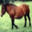

In [7]:
##Let us display the image after converting from array to image
pic = array_to_img(x_train_org[7])
display(pic)

In [8]:
#Now let us see the shape of y_train_all
y_train_org.shape
#it contains the class number for the object

(50000, 1)

In [9]:
#Let us see the object class number for the horse shown above
y_train_org[7][0]
#You can see the categories listed in a previous cell that category 7 is 'horse'.

7

In [10]:
#Since remembering all category numbers and their corresponding names is difficult, 
#let us create labels names list for our own convenience:
LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
#Testing our logic
LABEL_NAMES[y_train_org[7][0]]

'Horse'

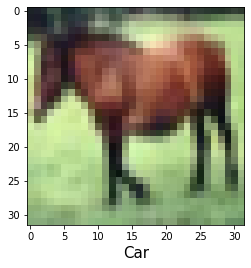

In [11]:
#An alternate method to view the image using matplotlib.
plt.imshow(x_train_org[7])
plt.xlabel(LABEL_NAMES[y_train_org[4][0]], fontsize=15)
plt.show()

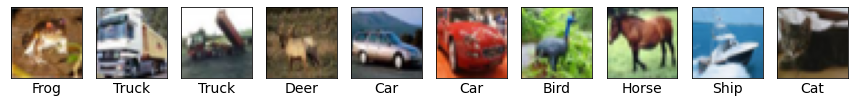

In [12]:
#matplotlib can display more than 1 images in a row; cannot be done with the display method.
plt.figure(figsize=(15,5))

#Let us print first 10 images of the x_train_all set along with the names of the objects
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(LABEL_NAMES[y_train_org[i][0]], fontsize=14)
    plt.imshow(x_train_org[i])

## Preprocessing Data

### Scaling and flattening the train data

In [13]:
#Scaling the training data between 0 and 1
x_train_scaled = x_train_org / 255.0

In [14]:
#Let us see the data again after scaling.
x_train_scaled
#note that this is a 4D tensor.

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [15]:
#Flattening the train tensor; placing all pixel for one image in one dimension
TOTAL_INPUTS=32*32*3
x_train_scaled_flat = x_train_scaled.reshape(x_train_scaled.shape[0], TOTAL_INPUTS)

In [16]:
#Let us see how this flat array looks like
x_train_scaled_flat
#Now it is a 2D tensor.

array([[0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
        0.28235294],
       [0.60392157, 0.69411765, 0.73333333, ..., 0.56078431, 0.52156863,
        0.56470588],
       [1.        , 1.        , 1.        , ..., 0.31372549, 0.3372549 ,
        0.32941176],
       ...,
       [0.1372549 , 0.69803922, 0.92156863, ..., 0.04705882, 0.12156863,
        0.19607843],
       [0.74117647, 0.82745098, 0.94117647, ..., 0.76470588, 0.74509804,
        0.67058824],
       [0.89803922, 0.89803922, 0.9372549 , ..., 0.63921569, 0.63921569,
        0.63137255]])

In [17]:
x_train_scaled_flat.shape
#Note that 3072 = 32 x 32 x 3

(50000, 3072)

### Scaling and flattening the test data

In [18]:
#Scaling the test tensor between 0 and 1.
x_test_scaled = x_test_org / 255.0

In [19]:
#Flattening the test tensor; placing all pixel for one image in one dimension
x_test_scaled_flat = x_test_scaled.reshape(x_test_scaled.shape[0], TOTAL_INPUTS)
x_test_scaled_flat

array([[0.61960784, 0.43921569, 0.19215686, ..., 0.08235294, 0.2627451 ,
        0.43137255],
       [0.92156863, 0.92156863, 0.92156863, ..., 0.72941176, 0.78431373,
        0.78039216],
       [0.61960784, 0.74509804, 0.87058824, ..., 0.02745098, 0.03137255,
        0.02745098],
       ...,
       [0.07843137, 0.05882353, 0.04705882, ..., 0.09803922, 0.07843137,
        0.18431373],
       [0.09803922, 0.15686275, 0.04705882, ..., 0.36078431, 0.47058824,
        0.31372549],
       [0.28627451, 0.30588235, 0.29411765, ..., 0.10588235, 0.10196078,
        0.10196078]])

In [20]:
#x_test
x_test_scaled_flat.shape

(10000, 3072)

In [21]:
#Renaming x_test_scaled_flat to simply x_test for easier use later.
x_test = x_test_scaled_flat
#Renaming y_test_org to simply y_test for easier use later.
y_test=y_test_org

### Creating Validation Dataset
Since the dataset is pretty large, let us make a third set also; by dividing the trainset further into train and validation sets.

In [22]:
VALIDATION_SIZE=10000

##Creating validation set
x_val = x_train_scaled_flat[:VALIDATION_SIZE]
y_val = y_train_org[:VALIDATION_SIZE]
x_val.shape

(10000, 3072)

In [23]:
##Creating the remaining train set
x_train = x_train_scaled_flat[VALIDATION_SIZE:]
y_train = y_train_org[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

So now we have three scaled and flattened datasets:
- The train set haing 40000 samples
- The validation set having 10000 samples
- The test set having 10000 samples

## Define the Neural Network using Keras

### Model 1

In [24]:
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m1_hidden1'),
    Dense(units=64, activation='relu', name='m1_hidden2'),
    Dense(16, activation='relu', name='m1_hidden3'),
    Dense(10, activation='softmax', name='m1_output')
])
#if we donot give names to the layers, then the names keep on changing on every run

model_1.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [25]:
type(model_1)
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 m1_hidden1 (Dense)          (None, 128)               393344    
                                                                 
 m1_hidden2 (Dense)          (None, 64)                8256      
                                                                 
 m1_hidden3 (Dense)          (None, 16)                1040      
                                                                 
 m1_output (Dense)           (None, 10)                170       
                                                                 
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


- Total neurons in layer m1_hidden1 = (TOTAL_INPUTS+1)*128   ;+1 for the additional bias node
- Total neurons in layer m1_hidden2 = (128+1)*64  
- Total neurons in layer m1_hidden3 = (64+1)*16
- Total neurons in layer m1_output = (16+1)*10

### Model 2

- With one dropout layer.

In [26]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128, activation='relu', name='m2_hidden1'))
model_2.add(Dense(64, activation='relu', name='m2_hidden2'))
model_2.add(Dense(15, activation='relu', name='m2_hidden3'))
model_2.add(Dense(10, activation='softmax', name='m2_output'))

model_2.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [27]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 3072)              0         
                                                                 
 m2_hidden1 (Dense)          (None, 128)               393344    
                                                                 
 m2_hidden2 (Dense)          (None, 64)                8256      
                                                                 
 m2_hidden3 (Dense)          (None, 15)                975       
                                                                 
 m2_output (Dense)           (None, 10)                160       
                                                                 
Total params: 402,735
Trainable params: 402,735
Non-trainable params: 0
_________________________________________________________________


### Model 3

- With two dropout layers. 
- The second dropout layer should be added after the first hidden layer and have a dropout rate of 25%. 

In [28]:
model_3 = Sequential()
model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(128, activation='relu', name='m3_hidden1'))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(64, activation='relu', name='m3_hidden2'))
model_3.add(Dense(15, activation='relu', name='m3_hidden3'))
model_3.add(Dense(10, activation='softmax', name='m3_output'))

model_3.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [29]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_1 (Dropout)         (None, 3072)              0         
                                                                 
 m3_hidden1 (Dense)          (None, 128)               393344    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 m3_hidden2 (Dense)          (None, 64)                8256      
                                                                 
 m3_hidden3 (Dense)          (None, 15)                975       
                                                                 
 m3_output (Dense)           (None, 10)                160       
                                                                 
Total params: 402,735
Trainable params: 402,735
Non-tr

## Tensorboard (visualising learning)

In [32]:
#Setting main folder and subfolders for tendboard
LOG_DIR = 'tensorboard_cifar_logs/'

def get_tensorboard(model_name):
    sub_folder_name = f'{model_name}_at_{strftime("%H_%M")}'
    dir_paths = os.path.join(LOG_DIR, sub_folder_name)
    os.makedirs(dir_paths)
    return TensorBoard(log_dir=dir_paths)

### Loading tensor board in notebook

In [33]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
%tensorboard --logdir=tensorboard_cifar_logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


If using Anaconda, you can open this tensor board in a new tab which gives mush better view. For this:
1. Open a new anaconda prompt.


2. On the command prompt type the following command to run TensorBoard:

  tensorboard --logdir=tensorboard_cifar_logs
  
  where LOG_DIR is the directory that we set up earlier for tensorboard.
  
  
3. Run the command and let it execute. After excution it will give an IP address which you can paste in fresh browser window where tensor boeard will be run.



## Fitting the Model

In [34]:
#Let us set some hyperparameters first. 
#You may use different values for different models, 
#but for simplicity here these are kept same for all the three models.
samples_per_batch = 1000
nr_epochs = 150

### Fitting Model 1 

In [35]:
%%time
model_1.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model_1')], verbose=0, validation_data=(x_val, y_val))

Wall time: 2min 46s


### Fitting Model 2

In [ ]:
%%time
model_2.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model_2')], verbose=0, validation_data=(x_val, y_val))

### Fitting Model 3

In [ ]:
%%time
model_3.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model_3')], verbose=0, validation_data=(x_val, y_val))

### Some points to remember:

- Models starts training from the point where it left last time. To avoid this, compile the model afresh.

- On different runs, the optimiser may start from a different point (different initial values of the weights), hence generating a different graphs each time.

## Making Predictions on Individual Images

- In the following code model_1 is used for prediction.
- You may use model_2 or model_3 too by making necessary alterations in the model name.

In [36]:
image_nr=4
x_val[image_nr].shape

(3072,)

In [37]:
##Adding a dimension as per requirement of predict method
test = np.expand_dims(x_val[image_nr], axis=0)
test.shape

(1, 3072)

In [38]:
model_1.predict(test)

1/1 [==============================] - 0s 101ms/step


array([[9.8724276e-02, 2.0316204e-02, 1.3187173e-03, 5.4737451e-05,
        7.7551450e-03, 4.5418208e-05, 5.6221035e-07, 6.2991574e-04,
        8.6390406e-01, 7.2508464e-03]], dtype=float32)

- Since the metric set while compiling the model was 'accuracy', so these 10 values given above in the output in the array are accuracy values for each of the 10 classes. 
- In such cases the prediction is made on the class having the highest accuracy.
- The following code picks the highest probability class for us.

In [39]:
#Picking the highest probability class
predicted_value=np.argmax(model_1.predict(test), axis=1)
actual_value=y_val[image_nr]

print(f'Actual value: {LABEL_NAMES[actual_value[0]]} vs. predicted: {LABEL_NAMES[predicted_value[0]]}')

1/1 [==============================] - 0s 18ms/step
Actual value: Car vs. predicted: Ship


In [40]:
#printing the corresponding class numbers.
print(f'Actual value: {y_val[0]} vs. predicted: {predicted_value}')

Actual value: [6] vs. predicted: [8]


## Evaluation
- Now let us evaluate model_1 for the test dataset that we initially kept aside.
- We already know the accoracy and loss values for train and validation dataset from tensor board, when we fitted out model.
- You can do the same for other two models, model_2 and model_3, too.

In [42]:
#Recalling the metrics that we set during compilation of the model.
model_1.metrics_names

['loss', 'accuracy']

In [43]:
# Let us print the loss funcstion value and overall accuracy of our model on test data.
test_loss, test_accuracy = model_1.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

313/313 [==============================] - 1s 2ms/step - loss: 1.5168 - accuracy: 0.4916
Test loss is 1.52 and test accuracy is 49.2%


### Confusion Matrix
- Now let us print the confusion matrix and find recall and precision values by using the formulas that we studied in class previously. 

In [44]:
predictions=np.argmax(model_1.predict(x_test), axis=1)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

313/313 [==============================] - 1s 2ms/step


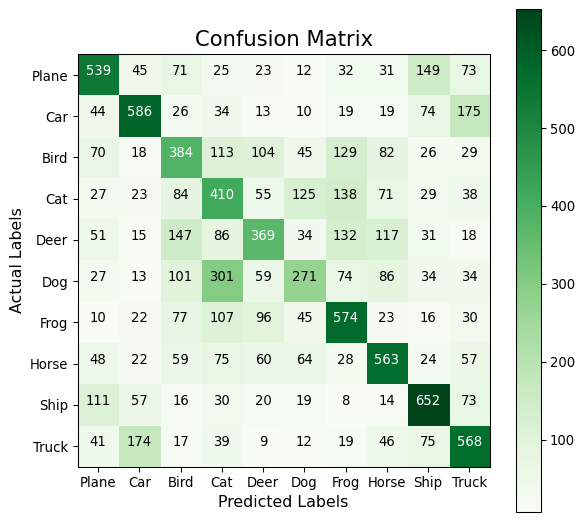

In [45]:
# displaying confustion matrix
plt.figure(figsize=(7,7), dpi=95)
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

tick_marks = np.arange(10)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

for i, j in itertools.product(range(10), range(10)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment='center',
            color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')
    

plt.show()

In [46]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall

array([0.539, 0.586, 0.384, 0.41 , 0.369, 0.271, 0.574, 0.563, 0.652,
       0.568])

In [47]:
avg_recall = np.mean(recall)
print(f'Model 1 recall score is {avg_recall:.2%}')

Model 1 recall score is 49.16%


In [48]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision

array([0.55681818, 0.60102564, 0.3910387 , 0.33606557, 0.45668317,
       0.42543171, 0.49783174, 0.5351711 , 0.58738739, 0.51872146])

In [50]:
avg_precision = np.mean(precision)
print(f'Model 1 precision score is {avg_precision:.2%}')

f1_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
print(f'Model 1 f1 score is {f1_score:.2%}')

Model 1 precision score is 49.06%
Model 1 f1 score is 49.11%
